In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv("results/dim_10_test_generic_seed_0_gradient_type_total_deriv_train.csv")
df2 = pd.read_csv("results/dim_10_test_generic_seed_0_gradient_type_partial_deriv_loss_beta_train.csv")

In [3]:
df1

,iteration,loss,params
0,0,-1.694368,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,-2.130776,"[0.5808950187287897, 0.2563054021360369, 0.393..."
2,2,-2.177364,"[0.6163390173189239, 0.2377849402156345, 0.442..."
3,3,-2.200011,"[0.5921901292264894, 0.17277226818571365, 0.45..."
4,4,-2.211236,"[0.552420063459259, 0.1493593787872147, 0.3829..."
...,...,...,...
95,95,-2.074630,"[0.2050860731753923, -0.20919120150887074, -0...."
96,96,-2.178100,"[0.34703023666794114, -0.05708370642416262, 0...."
97,97,-2.127051,"[0.24768046535636523, -0.18167854809027825, -0..."
98,98,-2.159956,"[0.2840839991808954, -0.10204510505692815, -0...."


In [4]:
def conversion_method(arr):
    l = []
    for s in arr:
        t = s[1:-1].split(", ")
        t = [float(x) for x in t]
        l.append(np.array(t).reshape(10, 1))
    return l

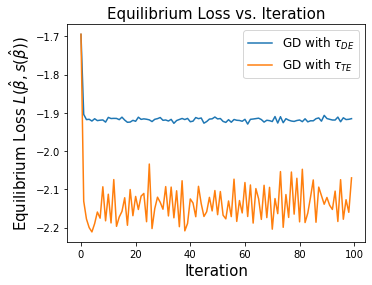

In [5]:
plt.figure(figsize=(16/3, 4))
plt.plot(df2["iteration"], df2["loss"], label="GD with " + r"$\tau_{DE}$")
plt.plot(df1["iteration"], df1["loss"], label="GD with " + r"$\tau_{TE}$")
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Equilibrium Loss " + r"$L(\hat{\beta}, s(\hat{\beta}))$", fontsize=15)
plt.legend(fontsize=12)
plt.title("Equilibrium Loss vs. Iteration", fontsize=15)
plt.savefig("figs/paper_plot_loss.pdf", bbox_inches='tight')

In [28]:
params1 = conversion_method(df1["params"])
params2 = conversion_method(df2["params"])

In [29]:
def all_norm(params):
    return [np.sqrt(np.sum(x ** 2)).item() for x in params]
    

Text(0.5, 1.0, 'Loss vs. Iteration')

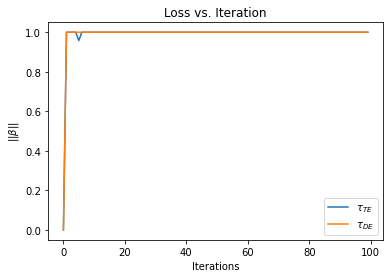

In [30]:
plt.plot(df1["iteration"], all_norm(params1), label=r"$\tau_{TE}$")
plt.xlabel("Iterations")
plt.ylabel(r"$|| \beta ||$")
plt.plot(df2["iteration"], all_norm(params2), label=r"$\tau_{DE}$")
plt.legend()
plt.title("Loss vs. Iteration")



In [2]:
df_all = pd.read_csv("results/dim_10_test_generic.csv")

In [3]:
df_all.groupby(["gradient_type"]).agg(["mean", "std"])

n          d      n_types          sigma  \
                              mean  std  mean  std    mean  std      mean   
gradient_type                                                               
partial_deriv_loss_beta  1000000.0  0.0  10.0  0.0    10.0  0.0  1.109279   
total_deriv              1000000.0  0.0  10.0  0.0    10.0  0.0  1.109279   

                                     q      seed          perturbation_s       \
                              std mean  std mean      std           mean  std   
gradient_type                                                                   
partial_deriv_loss_beta  0.247703  0.7  0.0  4.5  3.02765            0.2  0.0   
total_deriv              0.247703  0.7  0.0  4.5  3.02765            0.2  0.0   

                        perturbation_beta      final_loss            
                                     mean  std       mean       std  
gradient_type                                                        
partial_deriv_loss_beta             0.025  0.0  -1.809935  0.141643  
total_deriv                         0.025  0.0  -2.043367  0.120628